In [1]:
using RecipesBase
using Plots

In [2]:
# Our user-defined data type
struct T end

# This is all we define.  It uses a familiar signature, but strips it apart
# in order to add a custom definition to the internal method `RecipesBase.apply_recipe`
@recipe function plot(::T, n = 1; customcolor = :green)
    markershape --> :auto        # if markershape is unset, make it :auto
    markercolor :=  customcolor  # force markercolor to be customcolor
    xrotation   --> 45           # if xrotation is unset, make it 45
    zrotation   --> 90           # if zrotation is unset, make it 90
    rand(10,n)                   # return the arguments (input data) for the next recipe
end

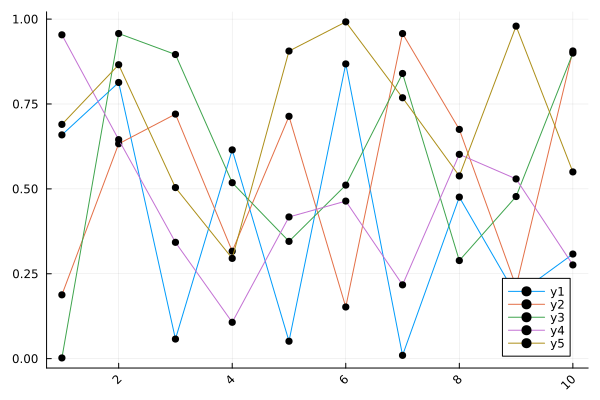

In [3]:
# This call will implicitly call `RecipesBase.apply_recipe` as part of the Plots
# processing pipeline (see the Pipeline section of the Plots documentation).
#   It will plot 5 line plots (a 5-column matrix is returned from the recipe).
#   All will have black circles:
#       - user override for markershape: :c == :circle
#       - customcolor overridden to :black, and markercolor is forced to be customcolor
#   If markershape is an unsupported keyword, the call will error.
#   By default, a warning will be shown for an unsupported keyword.
#   This will be suppressed for zrotation (:quiet flag).
plot(T(), 5; customcolor = :black, shape=:c)

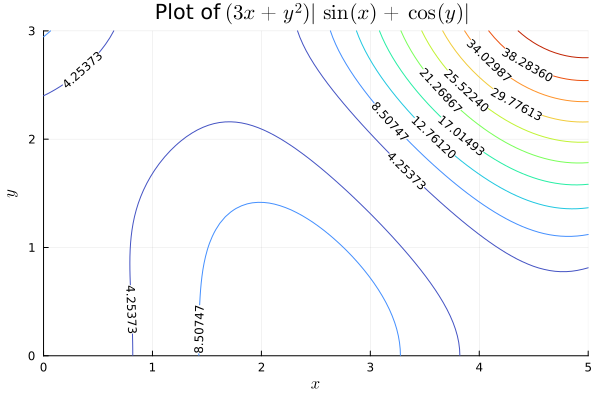

In [4]:
using LaTeXStrings

f(x, y) = (3x + y^2) * abs(sin(x) + cos(y))

x = range(0, 5, length=100)
y = range(0, 3, length=50)
z = @. f(x', y)

contour(x, y, z, levels=10, color=:turbo, clabels=true, cbar=false, lw=1)
title!(L"Plot of $(3x + y^2)|\sin(x) + \cos(y)|$")
xlabel!(L"x")
ylabel!(L"y")

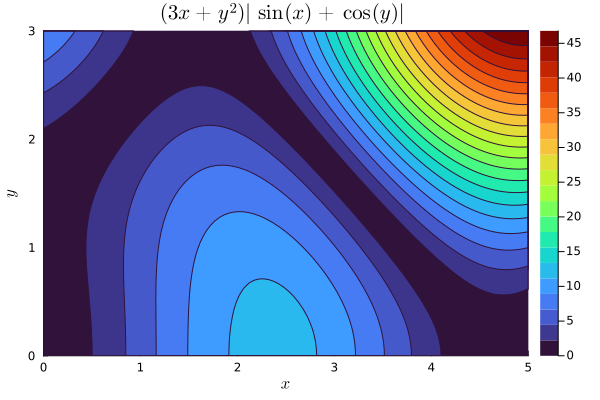

In [5]:
contourf(x, y, z
    , levels=20, color=:turbo
    , title = L"(3x + y^2)|\sin(x) + \cos(y)|"
    , xlabel = L"x", ylabel = L"y"
)

In [6]:
using Graphs, GraphPlot

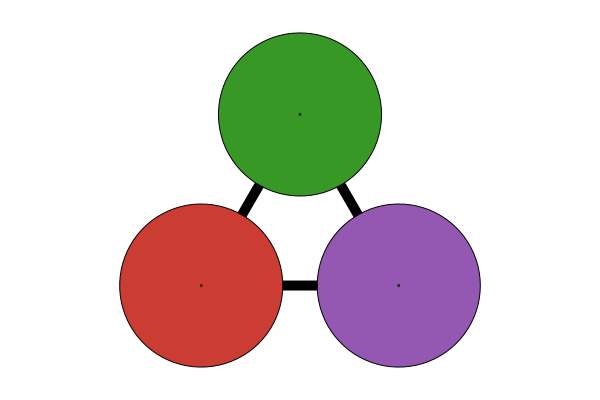

In [12]:

g = [0 1 1;
     1 0 1;
     1 1 0]

graphplot(g,
          x=[0,-1/tan(π/3),1/tan(π/3)], y=[1,0,0],
          nodeshape=:circle, nodesize=1.1,
          axis_buffer=0.6,
          curves=false,
          color=:black,
          nodecolor=[colorant"#389826",colorant"#CB3C33",colorant"#9558B2"],
          linewidth=10)

In [8]:
using GraphRecipes

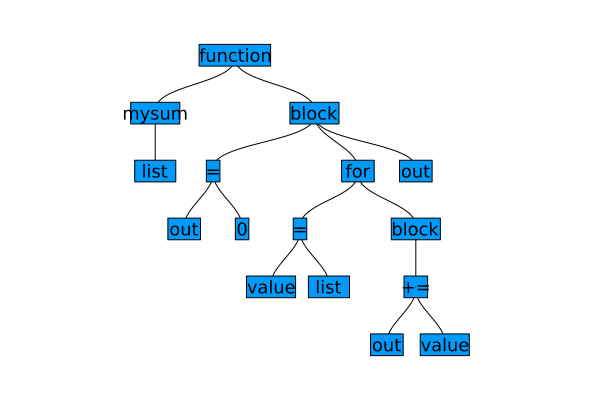

In [9]:
# default(size=(1000, 1000))

code = :(
function mysum(list)
    out = 0
    for value in list
        out += value
    end
    out
end
)

plot(code, fontsize=12, shorten=0.01, axis_buffer=0.15, nodeshape=:rect)

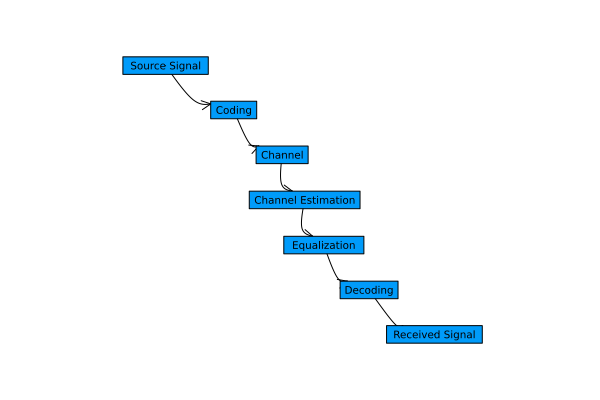

In [10]:

# Create a directed graph
g = DiGraph(7)  # Create a directed graph with 7 nodes
add_edge!(g, 1, 2)
add_edge!(g, 2, 3)
add_edge!(g, 3, 4)
add_edge!(g, 4, 5)
add_edge!(g, 5, 6)
add_edge!(g, 6, 7)

# Define node labels
labels = ["Source Signal"
    , "Coding"
    , "Channel"
    , "Channel Estimation"
    , "Equalization"
    , "Decoding"
    , "Received Signal"
]

# Plot the graph using GraphPlot
plot(g, names=labels, node_shape=:rect)


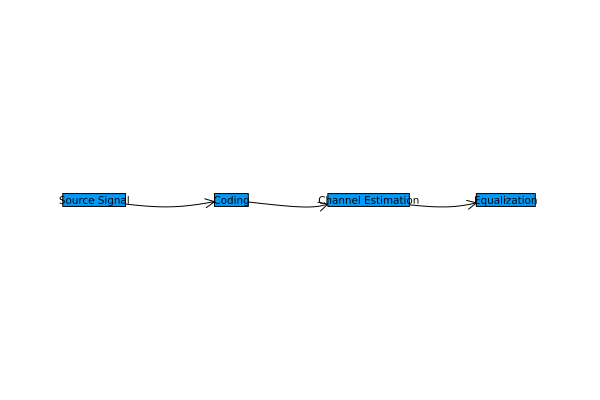

In [11]:
# Create a directed graph
g = DiGraph(4)  # Create a directed graph with 7 nodes
add_edge!(g, 1, 2)
add_edge!(g, 2, 3)
add_edge!(g, 3, 4)

# Define node labels
labels = ["Source Signal"
    , "Coding"
    # , "Channel"
    , "Channel Estimation"
    , "Equalization"
    # , "Decoding"
    # , "Received Signal"
]

# Plot the graph using GraphPlot
plot(g
    , names=labels
    , node_shape=:rect
    , x=1:4 # Define x and y positions to arrange nodes in a straight horizontal line
    , y=zeros(4) # All y positions are 0 to align them in one horizontal line
    # , layout=:fixed
)
